<a href="https://colab.research.google.com/github/Kaiziferr/-Miner_Detector/blob/master/imbalanced_classification/03_Threshold_Moving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
import warnings

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix

In [216]:
warnings.filterwarnings("ignore")

# **Descripción**
---


El conjunto de datos describe las propiedades químicas del vidrio e implica la clasificación de muestras de vidrio utilizando sus propiedades químicas como una de seis clases. El conjunto de datos fue acreditado a Vina Spiehler en 1987.


# **Diccionario**
---

- RI: Refractive Index
- Na: Sodium
- Mg: Magnesium
- Al: Aluminum
- Si: Silicon
- K: Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron
- Class:
  - building windows (float processed)
  - building windows (non-float processed)
  - vehicle windows (float processed)
  - vehicle windows (non-float processed)
  - containers
  - tableware
  - headlamps

# **Funciones**
---

In [217]:
def pie_circle(
    serie:pd.Series,
    paleta=None,
    figsize_x:int=7,
    figsize_y:int=7,
    fontsize=15,
    **kwards)->None:
  """Grafica un anillo"""

  values = serie.value_counts().sort_index()
  names = values.index
  size = values.values
  fig, ax = plt.subplots(figsize=(figsize_x, figsize_y))
  fig.suptitle(f'Diagrama de anillo {kwards["title"]}', fontsize=fontsize)
  my_circle = plt.Circle( (0,0), 0.7, color='white')
  plt.pie(
      size,
      labels=names,
      autopct="%0.1f %%",
      wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' },
      colors = paleta)
  p = plt.gcf()
  p.gca().add_artist(my_circle)
  plt.show()

paleta = {
    0: 'blue',
    1: 'red',
    2: 'orange',
    3: 'green',
    4: 'pink',
    5: 'black',
    6: 'gray',
    7: 'Cyan',
}
paleta = paleta.values()
print(paleta)
#pie_circle(data['Type'], paleta=None, title='Segmento')

dict_values(['blue', 'red', 'orange', 'green', 'pink', 'black', 'gray', 'Cyan'])


# **Data**
---

In [218]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'
names = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class']
data = pd.read_csv(url, names=names)

In [219]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [220]:
data['Class'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Class, dtype: int64

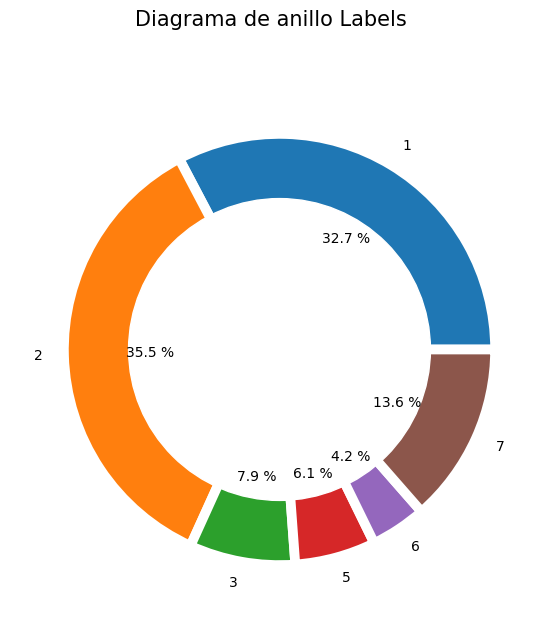

In [221]:
pie_circle(data['Class'], paleta=None, title='Labels')

- Se evidencia un desbalance entre las clases

# **Split**
---

In [222]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [223]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    shuffle=True,
    stratify=y,
    random_state=12354)

# **Model**
---

In [224]:
model_pre_pruning = DecisionTreeClassifier(random_state=12354)

In [225]:
criterion = ['gini', 'entropy', 'log_loss']
max_depth = [2, 4, 8, 10, 15]
min_samples_split = [3, 6, 9, 10]
min_samples_leaf = [3, 6, 9]

In [226]:
param_grid = dict(
    criterion = criterion,
    max_depth = max_depth,
    min_samples_split = min_samples_split,
    min_samples_leaf = min_samples_leaf
)

In [227]:
grid = GridSearchCV(
    estimator = model_pre_pruning,
    param_grid = param_grid,
    refit = True,
    return_train_score = True,
    scoring='f1_micro',
    cv = 10
)

In [228]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=12354),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 8, 10, 15],
                         'min_samples_leaf': [3, 6, 9],
                         'min_samples_split': [3, 6, 9, 10]},
             return_train_score=True, scoring='f1_micro')

In [229]:
print('Mejor: %f usando %s' % (grid.best_score_, grid.best_params_))

Mejor: 0.765238 usando {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 9}


In [230]:
model_final = grid.best_estimator_
model_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 9,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 12354,
 'splitter': 'best'}

In [231]:
y_predict_original = model_final.predict(X_test)

In [232]:
y_predict_original

array([1, 2, 1, 2, 2, 2, 1, 5, 7, 5, 1, 1, 5, 1, 7, 2, 7, 2, 2, 2, 7, 5,
       2, 1, 2, 1, 2, 6, 2, 2, 1, 1, 1, 2, 1, 7, 2, 2, 1, 1, 6, 7, 2, 7,
       1, 7, 2, 2, 2, 6, 1, 1, 7, 3, 7, 6, 1, 1, 3, 1, 6, 1, 1, 1, 1])

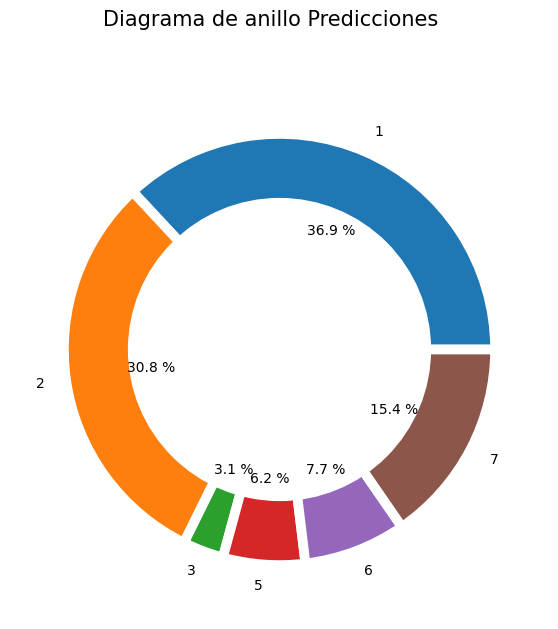

In [233]:
pie_circle(pd.Series(y_predict_original), paleta=None, title='Predicciones')

In [234]:
f1_score(
    y_test,
    y_predict_original,
    labels=[3, 5, 6], average='micro')

0.6086956521739131

In [235]:
y_prob = model_final.predict_proba(X_test)

In [236]:
y_predict = model_final.predict(X_test)

In [237]:
clasess = [str(i) for i in model_final.classes_.tolist()]

In [238]:
clasess

['1', '2', '3', '5', '6', '7']

In [239]:
prob_three = y_prob[:, 2]
prob_five = y_prob[:, 3]
prob_six = y_prob[:, 4]

In [240]:
pd.Series(prob_three).value_counts()

0.000000    54
0.333333     3
0.166667     3
0.250000     3
1.000000     2
dtype: int64

In [241]:
pd.Series(prob_five).value_counts()

0.000000    61
1.000000     3
0.666667     1
dtype: int64

In [242]:
pd.Series(prob_six).value_counts()

0.000000    57
0.125000     3
0.666667     3
0.600000     2
dtype: int64

Asumiremos para este ejercicio que las clases de interés son las 6,5,3

Se define un rango umbral

Validando el proceso, el problema de cambio de umbral radica en que se escogerá el umbral óptimo para todas las predicciones, lo cual lleva a resultados como cero, donde cualquier valor superior a ese umbral será la etiqueta seleccionada para la predicción, lo que llevara en gran medida a sesgar de manera excesiva el modelo. Además de existir un conflicto entre el resto de etiquetas.

In [243]:
thresholds = np.arange(0, 1, 0.001)

In [244]:
def to_labels(pos_probs, threshold, labels):
  tep = (pos_probs >= threshold).astype('int')
  tep[tep>0] = labels
  return tep

In [245]:
scores = [
    f1_score(
    y_test,
    to_labels(prob_three, t, 3),
    labels=[3],
    average='micro') for t in thresholds]

In [246]:
ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.001, F-Score=0.37500


In [247]:
scores = [
    f1_score(
    y_test,
    to_labels(prob_three, t, 5),
    labels=[5],
    average='micro') for t in thresholds]

In [248]:
ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.000, F-Score=0.11594


In [249]:
scores = [
    f1_score(
    y_test,
    to_labels(prob_three, t, 6),
    labels=[6],
    average='micro') for t in thresholds]

In [250]:
ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.000, F-Score=0.08824


Lo idóneo es poner un criterio, determinado por el conocimiento del negocio o criterio de experto. Se seleccionara un umbral de 0.2

In [251]:
y_predict_original

array([1, 2, 1, 2, 2, 2, 1, 5, 7, 5, 1, 1, 5, 1, 7, 2, 7, 2, 2, 2, 7, 5,
       2, 1, 2, 1, 2, 6, 2, 2, 1, 1, 1, 2, 1, 7, 2, 2, 1, 1, 6, 7, 2, 7,
       1, 7, 2, 2, 2, 6, 1, 1, 7, 3, 7, 6, 1, 1, 3, 1, 6, 1, 1, 1, 1])

In [252]:
y_predict

array([1, 2, 1, 2, 2, 2, 1, 5, 7, 5, 1, 1, 5, 1, 7, 2, 7, 2, 2, 2, 7, 5,
       2, 1, 2, 1, 2, 6, 2, 2, 1, 1, 1, 2, 1, 7, 2, 2, 1, 1, 6, 7, 2, 7,
       1, 7, 2, 2, 2, 6, 1, 1, 7, 3, 7, 6, 1, 1, 3, 1, 6, 1, 1, 1, 1])

In [253]:
clasess

['1', '2', '3', '5', '6', '7']

In [254]:
transformaciones_predicciones = pd.DataFrame(y_prob, columns=  clasess)
exceeds_threshold = False
label = None
for i in range(0,y_prob.shape[0]):
  v = np.argmax(transformaciones_predicciones.iloc[i, 2:5])
  match v:
    case 0:
      exceeds_threshold = transformaciones_predicciones.iloc[i, 2] > 0.3
      label = 3
    case 1:
      exceeds_threshold = transformaciones_predicciones.iloc[i, 3] > 0.2
      label = 5
    case 0:
      exceeds_threshold = transformaciones_predicciones.iloc[i, 4] > 0.1
      label = 6
    case _:
      exceeds_threshold = False
  if exceeds_threshold:
    print(i, v, label, np.argmax(transformaciones_predicciones.iloc[i, :]))
    y_predict[i] = label



7 1 5 3
9 1 5 3
12 1 5 3
13 0 3 0
21 1 5 3
30 0 3 0
50 0 3 0
53 0 3 2
58 0 3 2


In [255]:
pd.Series(y_predict_original).value_counts()

1    24
2    20
7    10
6     5
5     4
3     2
dtype: int64

In [256]:
pd.Series(y_predict).value_counts()

1    21
2    20
7    10
3     5
6     5
5     4
dtype: int64

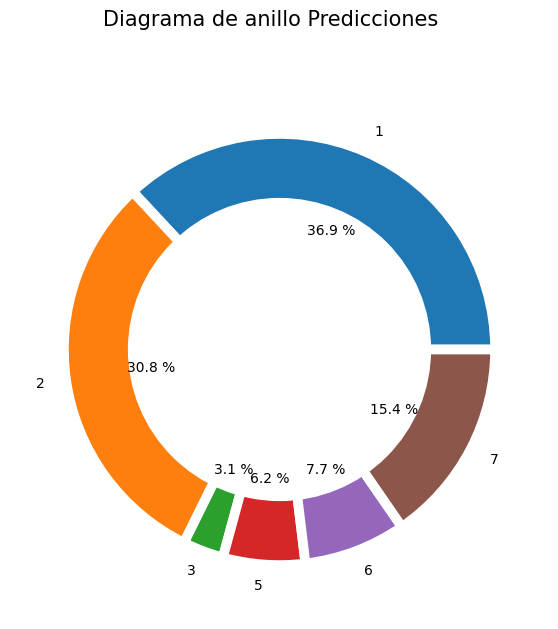

In [257]:
pie_circle(pd.Series(y_predict_original), paleta=None, title='Predicciones')

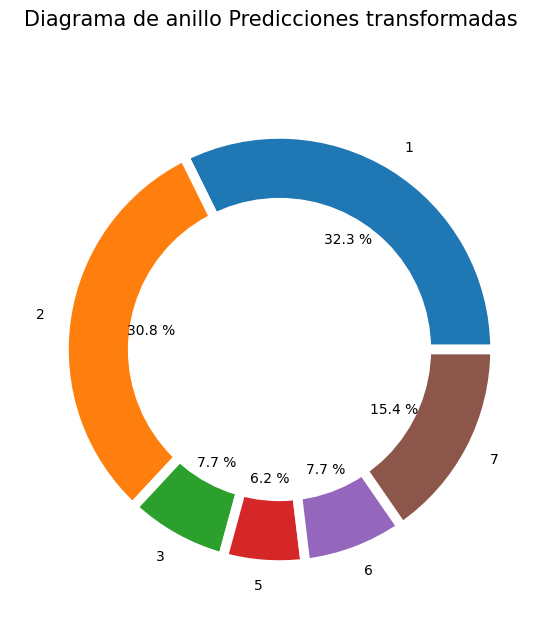

In [258]:
pie_circle(pd.Series(y_predict), paleta=None, title='Predicciones transformadas')

In [259]:
f1_score(
    y_test,
    y_predict,
    labels=[3, 5, 6], average='micro')

0.5384615384615384

El modelo aumentó su sensibilidad de predicción con respecto a la clase 3, aunque se redujo el rendimiento del modelo.